## Week 4 Homework

Task:

Given data about an instrumental variable, find the effect. X is the treatment, W the confounder, Y the outcome, and Z the instrument. Use homework_4.1.csv. 

In [40]:
import numpy as np
import pandas as pd
import math
import os

In [41]:
# read the data
df_1 = pd.read_csv(r'C:\Users\JT von Seggern\DS Masters Repos\2025-summer-mod-6\homework_4.1.csv')
df_1 = df_1.drop(columns='Unnamed: 0')
df_1.head()

,Z,W,X,Y
0,0,-0.155644,-0.496971,0.282484
1,1,0.529539,2.284240,4.740596
2,1,0.910514,0.872232,3.449569
3,1,-0.705476,2.157260,3.002531
4,0,-0.590874,-0.386730,-1.848796


In [42]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Z       5000 non-null   int64  
 1   W       5000 non-null   float64
 2   X       5000 non-null   float64
 3   Y       5000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 156.4 KB


In [43]:
df_1.describe()

,Z,W,X,Y
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.501400,-0.009934,0.501343,0.740279
std,0.500048,0.997779,1.127010,2.225679
min,0.000000,-3.303406,-3.404084,-7.032995
25%,0.000000,-0.697551,-0.272628,-0.787994
50%,1.000000,-0.032234,0.516908,0.718374
75%,1.000000,0.647618,1.254057,2.240705
max,1.000000,4.783257,4.693866,10.081975


In [44]:
# Differences in Differences between Y and X for each unique value of Z

# difference in Y
y_1 = df_1['Y'][df_1['Z'] == 1].values
y_2 = df_1['Y'][df_1['Z'] == 0].values
y_diff = np.mean(y_1) - np.mean(y_2)

# difference in X
x_1 = df_1['X'][df_1['Z'] == 1].values
x_2 = df_1['X'][df_1['Z'] == 0].values
x_diff = np.mean(x_1) - np.mean(x_2)

# difference in Y and X
diff = y_diff / x_diff

print(f"Difference based on instrumental variable (Y - X): {diff:.4f}")

Difference based on instrumental variable (Y - X): 1.5619


In [45]:
# Find the average of Y and X values for each unique value of Z for a narrow ranges of W

# narrow range of W
w_min = -.5
w_max = .5

# difference in y for narrow range of W
y_1_narrow = df_1['Y'][(df_1['Z'] == 1) & (df_1['W'] >= w_min) & (df_1['W'] <= w_max)].values
y_2_narrow = df_1['Y'][(df_1['Z'] == 0) & (df_1['W'] >= w_min) & (df_1['W'] <= w_max)].values
y_diff_narrow = np.mean(y_1_narrow) - np.mean(y_2_narrow)

# difference in x for narrow range of W
x_1_narrow = df_1['X'][(df_1['Z'] == 1) & (df_1['W'] >= w_min) & (df_1['W'] <= w_max)].values
x_2_narrow = df_1['X'][(df_1['Z'] == 0) & (df_1['W'] >= w_min) & (df_1['W'] <= w_max)].values
x_diff_narrow = np.mean(x_1_narrow) - np.mean(x_2_narrow)

# difference in Y and X for narrow range of W
diff_narrow = y_diff_narrow / x_diff_narrow
print(f"Difference (Y - X) in instrumental variable Z for narrow range of W: {diff_narrow:.4f}")


Difference (Y - X) in instrumental variable Z for narrow range of W: 1.5545


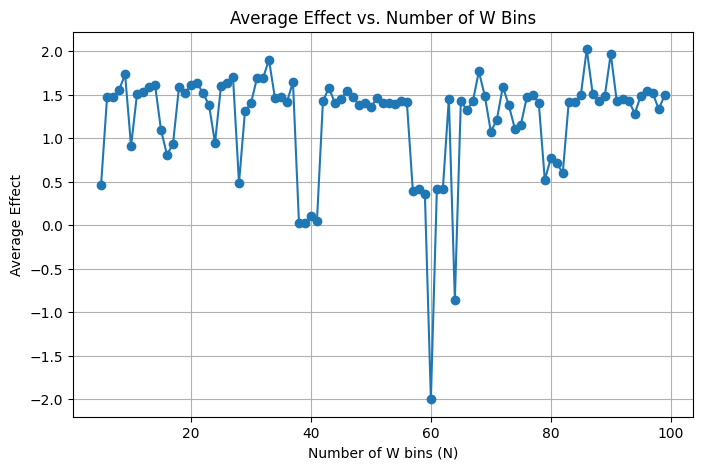

In [46]:
import matplotlib.pyplot as plt

# Try different values of N and plot the average effect for each
N_values = range(5, 100)
avg_effects = []

for N in N_values:
    w_min = df_1['W'].min()
    w_max = df_1['W'].max()
    w_edges = np.linspace(w_min, w_max, N + 1)
    effects = []

    for i in range(N):
        w_lo = w_edges[i]
        w_hi = w_edges[i + 1]
        mask = (df_1['W'] >= w_lo) & (df_1['W'] < w_hi)
        df_bin = df_1[mask]
        # Only compute if both Z=0 and Z=1 are present
        if df_bin['Z'].nunique() == 2:
            y_1 = df_bin['Y'][df_bin['Z'] == 1].mean()
            y_0 = df_bin['Y'][df_bin['Z'] == 0].mean()
            x_1 = df_bin['X'][df_bin['Z'] == 1].mean()
            x_0 = df_bin['X'][df_bin['Z'] == 0].mean()
            x_diff = x_1 - x_0
            if x_diff != 0:
                effect = (y_1 - y_0) / x_diff
                effects.append(effect)
    if effects:
        avg_effect = np.mean(effects)
    else:
        avg_effect = np.nan

    avg_effects.append(avg_effect)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(N_values, avg_effects, marker='o')
plt.xlabel('Number of W bins (N)')
plt.ylabel('Average Effect')
plt.title('Average Effect vs. Number of W Bins')
plt.grid(True)
plt.show()

In [47]:
# import the 4.2a and 4.2b data files
df_2 = pd.read_csv(r'C:\Users\JT von Seggern\DS Masters Repos\2025-summer-mod-6\homework_4.2.a.csv')
df_3 = pd.read_csv(r'C:\Users\JT von Seggern\DS Masters Repos\2025-summer-mod-6\homework_4.2.b.csv')

df_2 = df_2.drop(columns='Unnamed: 0')
df_3 = df_3.drop(columns='Unnamed: 0')

df_3 = df_3.rename(columns={'Y2': 'Y', 'X2': 'X'})

In [48]:
df_2.head()

,X,Y
0,85.070366,1
1,79.038051,1
2,86.987260,1
3,73.520540,1
4,95.446232,1


In [49]:
df_3.head()

,X,Y
0,73.863472,0
1,90.532024,1
2,72.563689,0
3,78.487566,0
4,80.404340,0


In [50]:
# Given a cutoff score of 80, which dataset seems most likely to involve a non-zero linear term in the regression model?

# Create datasets before and after the cutoff
df_2_before = df_2[df_2['X'] < 80]
df_2_after = df_2[df_2['X'] >= 80]

df_3_before = df_2[df_2['X'] < 80]
df_3_after = df_2[df_2['X'] >= 80]


Logistic Regression Discontinuity Summary for df_2:
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 12 Jun 2025   Pseudo R-squ.:                 0.07344
Time:                        20:31:37   Log-Likelihood:                -6363.6
converged:                       True   LL-Null:                       -6867.9
Covariance Type:            nonrobust   LLR p-value:                9.073e-220
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9101      0.043    -21.304      0.000      -0.994      -0.826
treat          1.3089      0.072     18.197      0.000       1.168       1.450

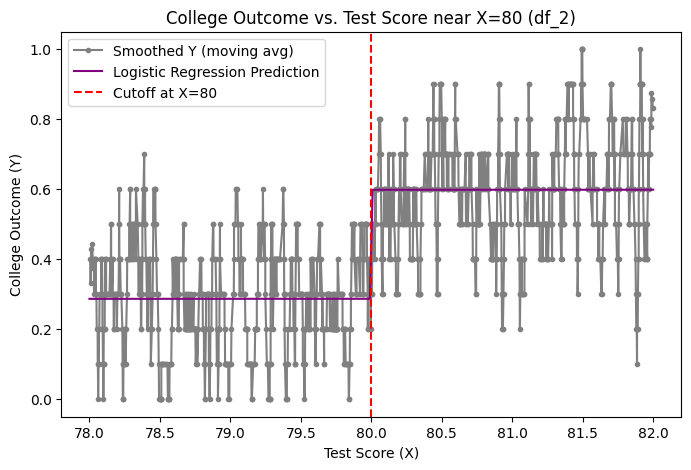


Logistic Regression Discontinuity Summary for df_3:
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 12 Jun 2025   Pseudo R-squ.:                 0.09824
Time:                        20:31:37   Log-Likelihood:                -5502.4
converged:                       True   LL-Null:                       -6101.8
Covariance Type:            nonrobust   LLR p-value:                4.540e-261
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4481      0.050    -29.242      0.000      -1.545      -1.351
treat          0.9444      0.079     11.897      0.000       0.789       1.100

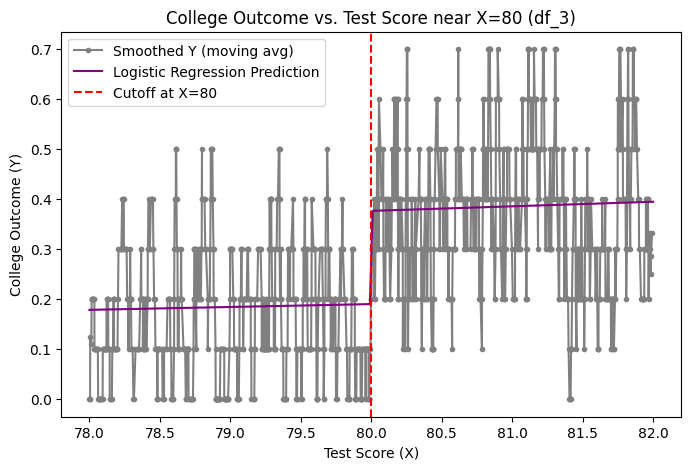

In [55]:
import statsmodels.api as sm

for df, label in zip([df_2, df_3], ['df_2', 'df_3']):
    # Create a binary outcome for logistic regression (e.g., Y > median(Y))
    y_binary = (df['Y'] > df['Y'].median()).astype(int)
    df['running'] = df['X'] - 80
    df['treat'] = (df['X'] >= 80).astype(int)

    # Model: Y_binary ~ treat + running
    X_rdd = sm.add_constant(df[['treat', 'running']])
    model_logit = sm.Logit(y_binary, X_rdd).fit(disp=0)

    print(f"\nLogistic Regression Discontinuity Summary for {label}:")
    print(model_logit.summary())

    # Plotting in a small range around X=80
    x_window = 2
    mask = (df['X'] >= 80 - x_window) & (df['X'] <= 80 + x_window)
    df_window = df[mask].copy()
    y_window = y_binary[mask]

    plt.figure(figsize=(8, 5))

    # Plot moving average of Y (smoothed ground truth)
    df_window_sorted = df_window.sort_values('X')
    window_size = 10  # number of points for moving average
    y_smooth = df_window_sorted['Y'].rolling(window=window_size, center=True, min_periods=1).mean()
    plt.plot(df_window_sorted['X'], y_smooth, '.-', color='gray', label='Smoothed Y (moving avg)')

    # Plot predicted probability from logistic regression
    x_vals = np.linspace(80 - x_window, 80 + x_window, 200)
    running_vals = x_vals - 80
    treat_vals = (x_vals >= 80).astype(int)
    X_pred = np.column_stack([np.ones_like(x_vals), treat_vals, running_vals])
    y_pred_prob = model_logit.predict(X_pred)
    plt.plot(x_vals, y_pred_prob, color='purple', label='Logistic Regression Prediction')

    plt.axvline(80, color='red', linestyle='--', label='Cutoff at X=80')
    plt.xlabel('Test Score (X)')
    plt.ylabel('College Outcome (Y)')
    plt.title(f'College Outcome vs. Test Score near X=80 ({label})')
    plt.legend()
    plt.show()